<a href="https://colab.research.google.com/github/sanjanb/GAN-GenAI/blob/main/GAN_using_DenseNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers

In [2]:
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [3]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

train_images.shape

(60000, 28, 28, 1)

In [4]:
train_images[56782, :10, :10]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  1.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [  0.],
        [ 74.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [  0.],
        [ 77.],
        [207.]],

       [[  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [124.],
        [176.],
        [192.],
        [180.]],

       [[  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [ 88.],
        [207.],
        [184.],
        [183.],
        [182.]],

       [[  0.],
        [  0

In [5]:
train_images = (train_images - 127.5) / 127.5

train_images[56782, :10, :10]

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.41960785]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.39607844],
        [ 0.62352943]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
   

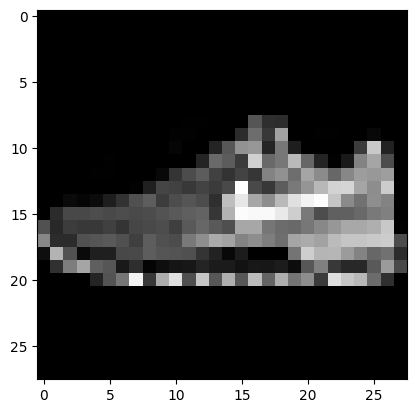

In [6]:
plt.imshow(train_images[2567].squeeze(), cmap = 'gray')

In [7]:
buffer_size = 60000
batch_size = 128

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

In [9]:
def generator_model():

    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim = 100))
    model.add(layers.ReLU())

    model.add(layers.Dense(128))
    model.add(layers.ReLU())

    model.add(layers.Dense(256))
    model.add(layers.ReLU())

    model.add(layers.Dense(784, activation = 'tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

In [10]:
generator = generator_model()

generator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         201,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,296 (973.81 KB)

 Trainable params: 249,296 (973.81 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training = False)

generated_image.shape

TensorShape([1, 28, 28, 1])

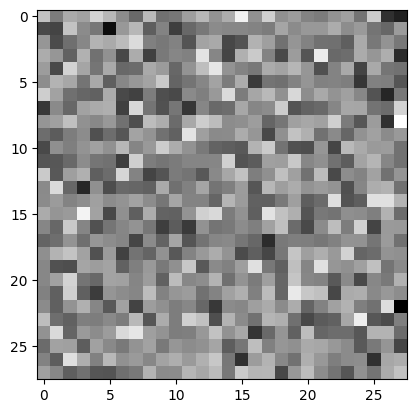

In [14]:
plt.imshow(generated_image[0, :, :, 0], cmap = 'gray')

In [15]:
def discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape = (28, 28, 1)))
    model.add(layers.Flatten())

    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(64))
    model.add(layers.LeakyReLU(0.2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(1, activation = 'sigmoid'))

    return model

In [16]:
discriminator = discriminator_model()

discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,177 (946.00 KB)

 Trainable params: 242,177 (946.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
discriminator = discriminator_model()
output = discriminator(generated_image)
print (output)

tf.Tensor([[0.5365589]], shape=(1, 1), dtype=float32)


In [18]:
bce = tf.keras.losses.BinaryCrossentropy()

In [19]:
def discriminator_loss(real_output, fake_output):

    real_loss = bce(tf.ones_like(real_output), real_output)

    fake_loss = bce(tf.zeros_like(fake_output), fake_output)

    total_loss = real_loss + fake_loss

    return total_loss

In [20]:
def generator_loss(fake_output):

    gen_loss = bce(tf.ones_like(fake_output), fake_output)

    return gen_loss

In [21]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 )
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 )

In [22]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer = discriminator_optimizer,
                                 generator = generator,
                                 discriminator = discriminator)

In [23]:
epochs = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [24]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)

        real_output = discriminator(images, training = True)
        fake_output = discriminator(generated_images, training = True)

        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_loss, disc_loss, tf.reduce_mean(real_output), tf.reduce_mean(fake_output))

In [25]:
def generate_and_plot_images(model, epoch, test_input):

    predictions = model(test_input, training = False)

    fig = plt.figure(figsize = (8, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        pred = (predictions[i, :, :, 0] + 1) * 127.5
        pred = np.array(pred)
        plt.imshow(pred.astype(np.uint8), cmap = 'gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [26]:
def train(dataset, epochs):

    gen_loss_list = []
    disc_loss_list = []

    real_score_list =[]
    fake_score_list =[]
    for epoch in tqdm(range(epochs)):
        start = time.time()
        num_batches = len(dataset)

        print(f'Training started with  epoch {epoch + 1} with {num_batches} batches...')

        total_gen_loss = 0
        total_disc_loss = 0

        for batch in dataset:
            generator_loss, discriminator_loss, real_score, fake_score = train_step(batch)
            total_gen_loss += generator_loss
            total_disc_loss += discriminator_loss

        mean_gen_loss = total_gen_loss / num_batches
        mean_disc_loss = total_disc_loss / num_batches

        print('Losses after epoch %5d: generator %.3f, discriminator %.3f, real_score %.2f%%, fake_score %.2f%%'  %
              (epoch + 1, generator_loss, discriminator_loss, real_score * 100, fake_score * 100))

        generate_and_plot_images(generator, epoch + 1, seed)

        gen_loss_list.append(mean_gen_loss)
        disc_loss_list.append(mean_disc_loss)
        real_score_list.append(real_score)
        fake_score_list.append(fake_score)

        if (epoch + 1) % 10 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))


    return  gen_loss_list, disc_loss_list, real_score_list, fake_score_list

  0%|          | 0/50 [00:00<?, ?it/s]

Training started with  epoch 1 with 469 batches...
Losses after epoch     1: generator 1.332, discriminator 0.671, real_score 91.76%, fake_score 30.92%


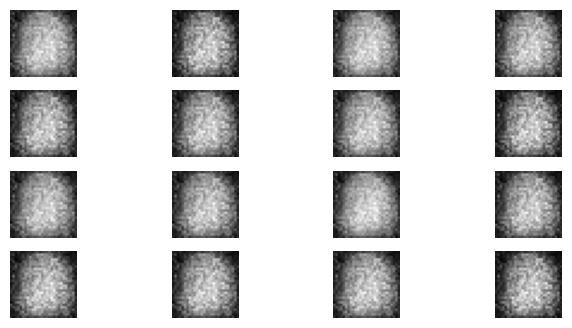

  2%|▏         | 1/50 [00:10<08:48, 10.79s/it]

Time for epoch 1 is 10.79346227645874 sec
Training started with  epoch 2 with 469 batches...
Losses after epoch     2: generator 4.248, discriminator 0.164, real_score 95.40%, fake_score 5.34%


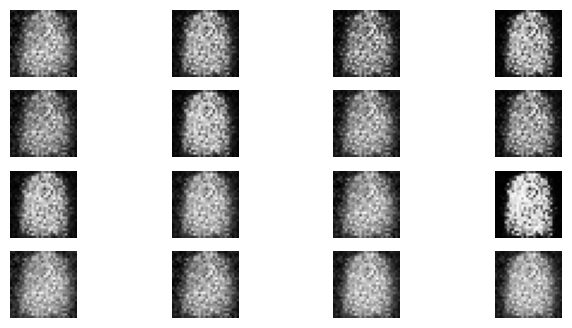

  4%|▍         | 2/50 [00:14<05:03,  6.33s/it]

Time for epoch 2 is 3.202345371246338 sec
Training started with  epoch 3 with 469 batches...
Losses after epoch     3: generator 3.289, discriminator 0.357, real_score 88.35%, fake_score 11.72%


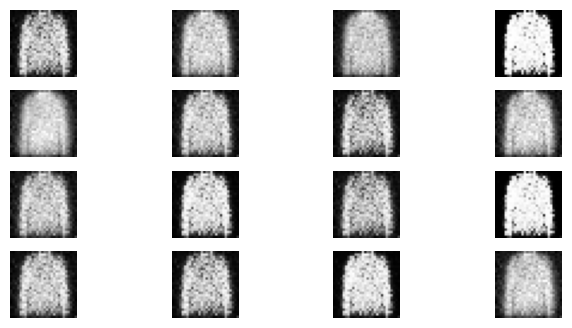

  6%|▌         | 3/50 [00:17<04:06,  5.25s/it]

Time for epoch 3 is 3.950040340423584 sec
Training started with  epoch 4 with 469 batches...
Losses after epoch     4: generator 2.540, discriminator 0.362, real_score 91.45%, fake_score 11.15%


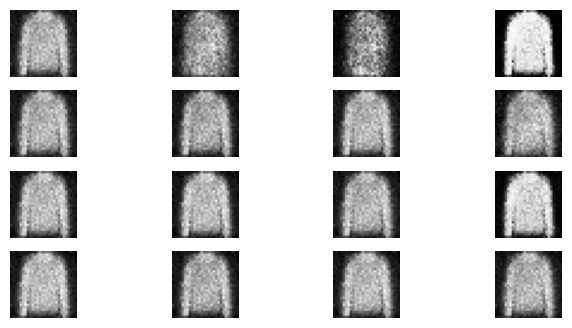

  8%|▊         | 4/50 [00:22<03:47,  4.94s/it]

Time for epoch 4 is 4.459055662155151 sec
Training started with  epoch 5 with 469 batches...
Losses after epoch     5: generator 2.488, discriminator 0.447, real_score 89.42%, fake_score 14.60%


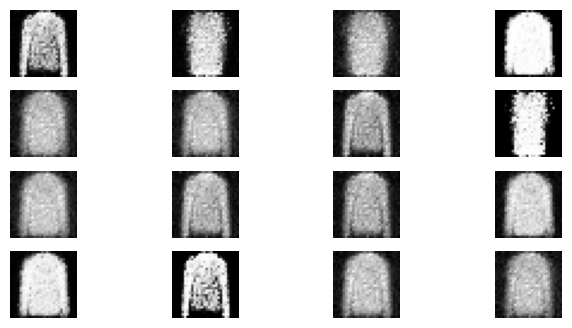

 10%|█         | 5/50 [00:25<03:14,  4.32s/it]

Time for epoch 5 is 3.2221410274505615 sec
Training started with  epoch 6 with 469 batches...
Losses after epoch     6: generator 3.546, discriminator 0.239, real_score 94.23%, fake_score 8.64%


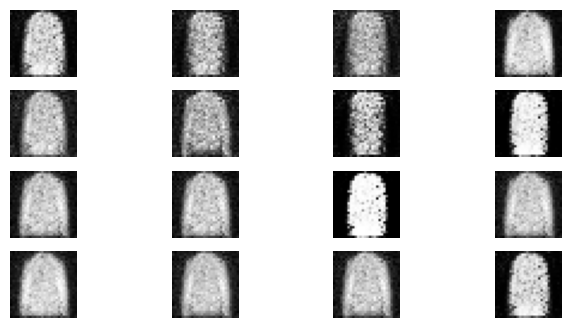

 12%|█▏        | 6/50 [00:29<02:56,  4.02s/it]

Time for epoch 6 is 3.4226410388946533 sec
Training started with  epoch 7 with 469 batches...
Losses after epoch     7: generator 3.467, discriminator 0.285, real_score 90.98%, fake_score 9.83%


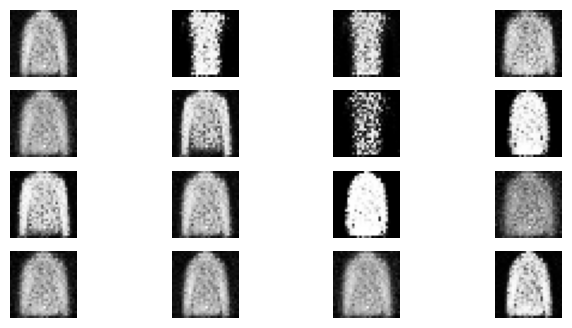

 14%|█▍        | 7/50 [00:32<02:50,  3.96s/it]

Time for epoch 7 is 3.8484997749328613 sec
Training started with  epoch 8 with 469 batches...
Losses after epoch     8: generator 3.313, discriminator 0.385, real_score 88.96%, fake_score 12.43%


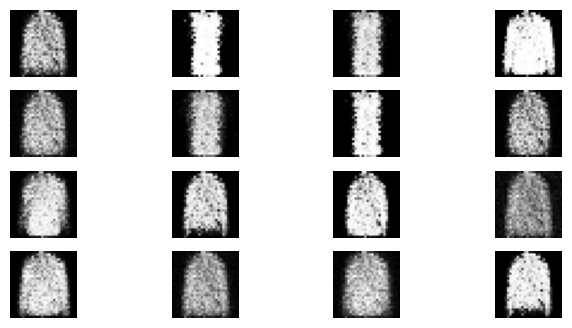

 16%|█▌        | 8/50 [00:36<02:36,  3.71s/it]

Time for epoch 8 is 3.1842477321624756 sec
Training started with  epoch 9 with 469 batches...
Losses after epoch     9: generator 3.031, discriminator 0.332, real_score 90.93%, fake_score 10.39%


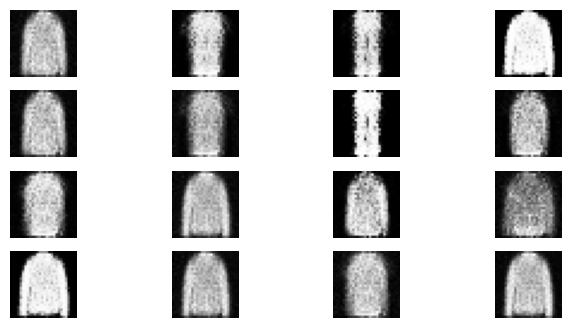

 18%|█▊        | 9/50 [00:39<02:25,  3.54s/it]

Time for epoch 9 is 3.151740789413452 sec
Training started with  epoch 10 with 469 batches...
Losses after epoch    10: generator 2.944, discriminator 0.327, real_score 87.65%, fake_score 11.05%


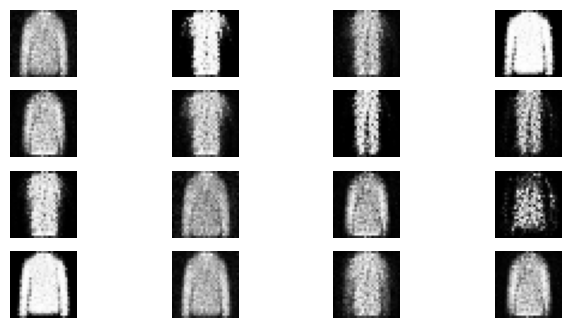

 20%|██        | 10/50 [00:43<02:26,  3.67s/it]

Time for epoch 10 is 3.9572033882141113 sec
Training started with  epoch 11 with 469 batches...
Losses after epoch    11: generator 3.030, discriminator 0.319, real_score 86.31%, fake_score 9.30%


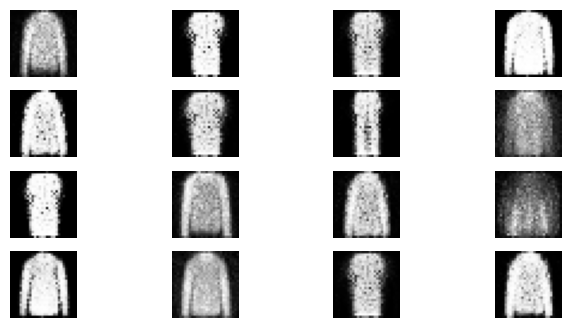

 22%|██▏       | 11/50 [00:46<02:16,  3.51s/it]

Time for epoch 11 is 3.149487018585205 sec
Training started with  epoch 12 with 469 batches...
Losses after epoch    12: generator 2.481, discriminator 0.579, real_score 83.35%, fake_score 17.40%


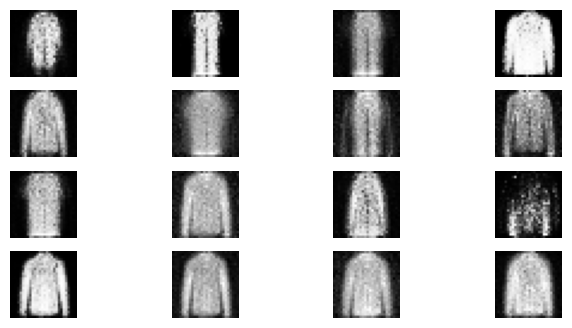

 24%|██▍       | 12/50 [00:49<02:12,  3.49s/it]

Time for epoch 12 is 3.448500156402588 sec
Training started with  epoch 13 with 469 batches...
Losses after epoch    13: generator 3.462, discriminator 0.551, real_score 84.98%, fake_score 11.11%


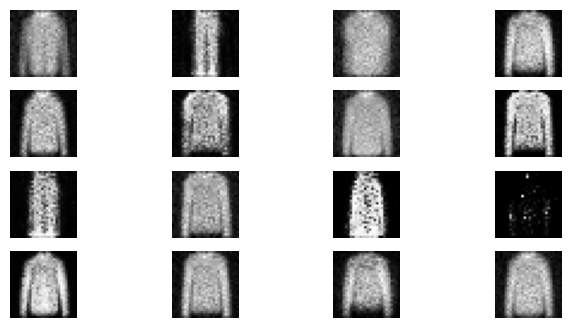

 26%|██▌       | 13/50 [00:53<02:05,  3.40s/it]

Time for epoch 13 is 3.180501699447632 sec
Training started with  epoch 14 with 469 batches...
Losses after epoch    14: generator 1.627, discriminator 0.741, real_score 87.00%, fake_score 30.47%


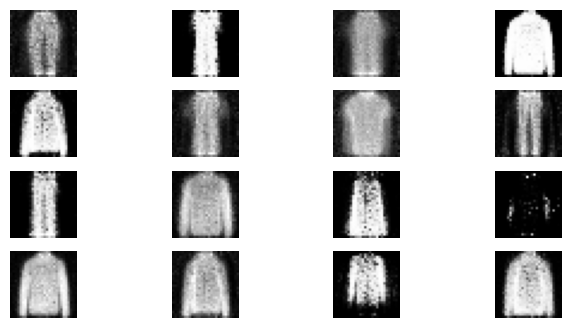

 28%|██▊       | 14/50 [00:56<02:07,  3.54s/it]

Time for epoch 14 is 3.856841564178467 sec
Training started with  epoch 15 with 469 batches...
Losses after epoch    15: generator 3.225, discriminator 0.370, real_score 85.01%, fake_score 9.39%


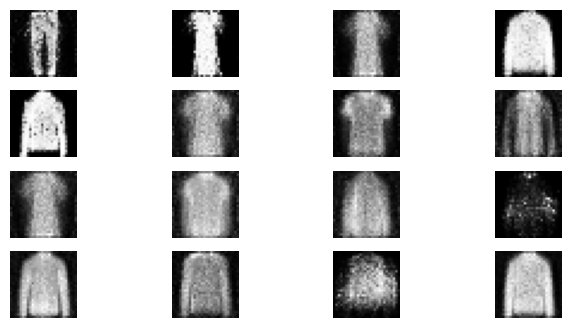

 30%|███       | 15/50 [01:00<01:59,  3.43s/it]

Time for epoch 15 is 3.173126220703125 sec
Training started with  epoch 16 with 469 batches...
Losses after epoch    16: generator 2.120, discriminator 0.779, real_score 79.57%, fake_score 22.59%


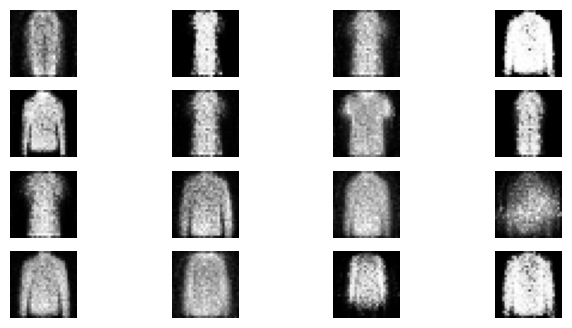

 32%|███▏      | 16/50 [01:03<01:54,  3.36s/it]

Time for epoch 16 is 3.214155673980713 sec
Training started with  epoch 17 with 469 batches...
Losses after epoch    17: generator 2.164, discriminator 0.873, real_score 76.29%, fake_score 21.48%


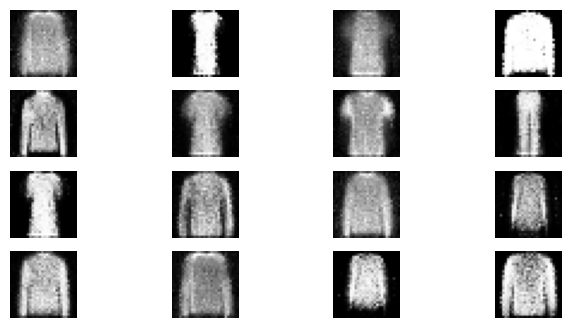

 34%|███▍      | 17/50 [01:07<01:58,  3.58s/it]

Time for epoch 17 is 4.097310543060303 sec
Training started with  epoch 18 with 469 batches...
Losses after epoch    18: generator 2.885, discriminator 0.422, real_score 86.99%, fake_score 13.29%


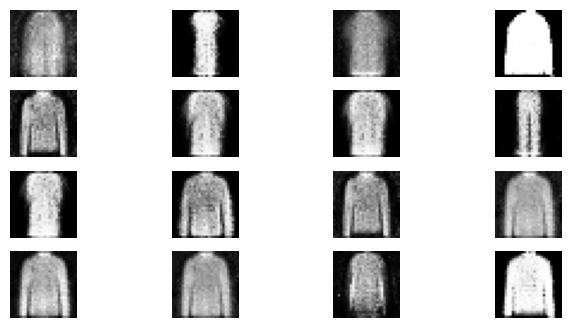

 36%|███▌      | 18/50 [01:10<01:50,  3.46s/it]

Time for epoch 18 is 3.164396286010742 sec
Training started with  epoch 19 with 469 batches...
Losses after epoch    19: generator 2.336, discriminator 0.773, real_score 73.91%, fake_score 18.45%


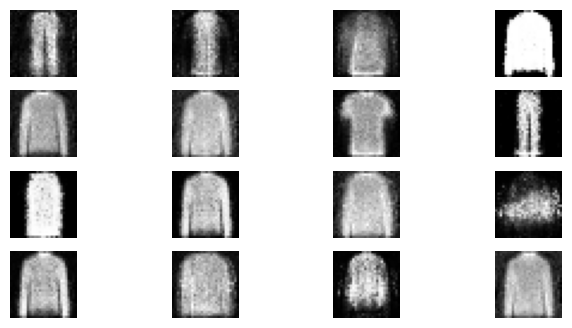

 38%|███▊      | 19/50 [01:13<01:44,  3.38s/it]

Time for epoch 19 is 3.1959123611450195 sec
Training started with  epoch 20 with 469 batches...
Losses after epoch    20: generator 2.938, discriminator 0.518, real_score 84.28%, fake_score 17.34%


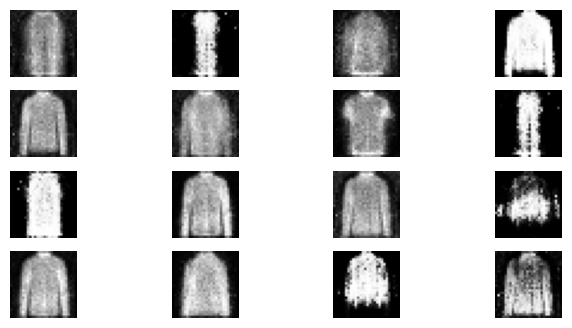

 40%|████      | 20/50 [01:17<01:40,  3.36s/it]

Time for epoch 20 is 3.3081414699554443 sec
Training started with  epoch 21 with 469 batches...
Losses after epoch    21: generator 2.167, discriminator 0.671, real_score 74.60%, fake_score 15.80%


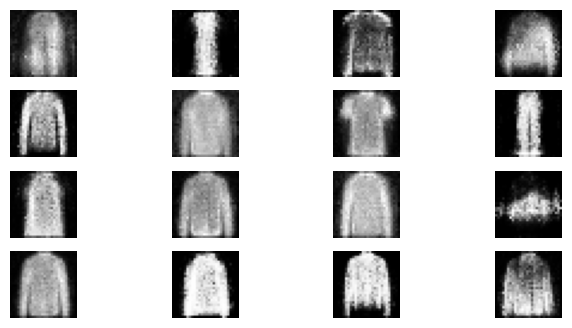

 42%|████▏     | 21/50 [01:20<01:41,  3.51s/it]

Time for epoch 21 is 3.8454673290252686 sec
Training started with  epoch 22 with 469 batches...
Losses after epoch    22: generator 2.491, discriminator 0.623, real_score 81.04%, fake_score 17.92%


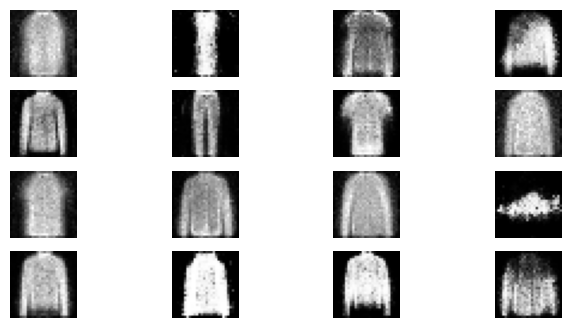

 44%|████▍     | 22/50 [01:24<01:35,  3.41s/it]

Time for epoch 22 is 3.2000014781951904 sec
Training started with  epoch 23 with 469 batches...
Losses after epoch    23: generator 2.227, discriminator 0.616, real_score 79.77%, fake_score 18.03%


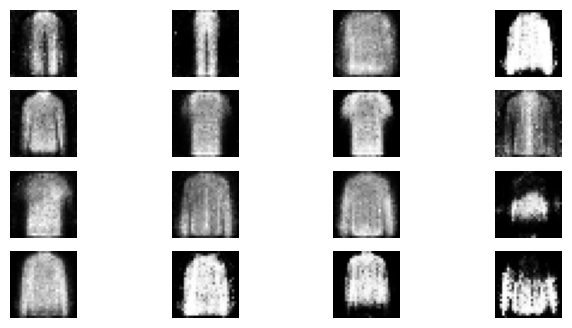

 46%|████▌     | 23/50 [01:27<01:31,  3.37s/it]

Time for epoch 23 is 3.270371437072754 sec
Training started with  epoch 24 with 469 batches...
Losses after epoch    24: generator 1.970, discriminator 0.582, real_score 80.61%, fake_score 20.86%


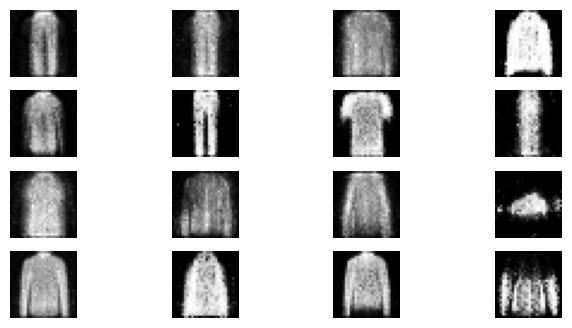

 48%|████▊     | 24/50 [01:31<01:33,  3.59s/it]

Time for epoch 24 is 4.109282493591309 sec
Training started with  epoch 25 with 469 batches...
Losses after epoch    25: generator 1.463, discriminator 1.263, real_score 73.74%, fake_score 35.88%


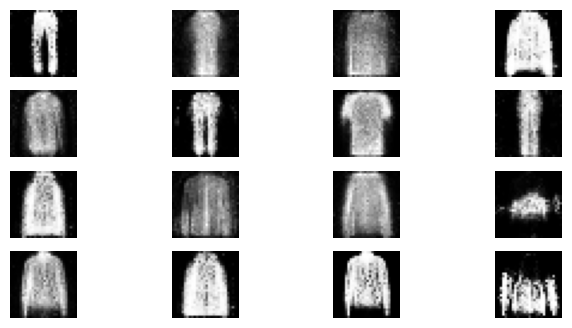

 50%|█████     | 25/50 [01:34<01:27,  3.48s/it]

Time for epoch 25 is 3.2267582416534424 sec
Training started with  epoch 26 with 469 batches...
Losses after epoch    26: generator 1.709, discriminator 0.943, real_score 81.33%, fake_score 32.31%


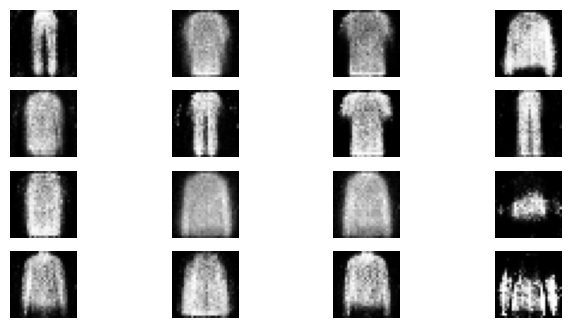

 52%|█████▏    | 26/50 [01:38<01:23,  3.48s/it]

Time for epoch 26 is 3.485443353652954 sec
Training started with  epoch 27 with 469 batches...
Losses after epoch    27: generator 1.743, discriminator 0.718, real_score 79.31%, fake_score 28.93%


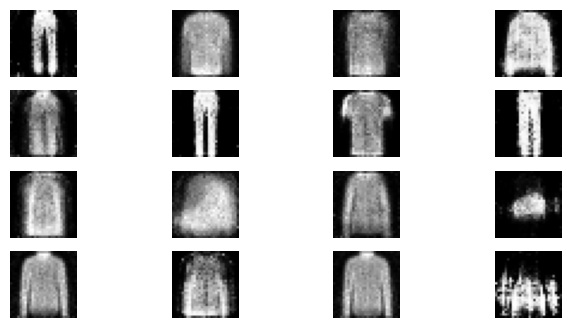

 54%|█████▍    | 27/50 [01:41<01:18,  3.39s/it]

Time for epoch 27 is 3.1803364753723145 sec
Training started with  epoch 28 with 469 batches...
Losses after epoch    28: generator 2.342, discriminator 0.650, real_score 81.24%, fake_score 20.12%


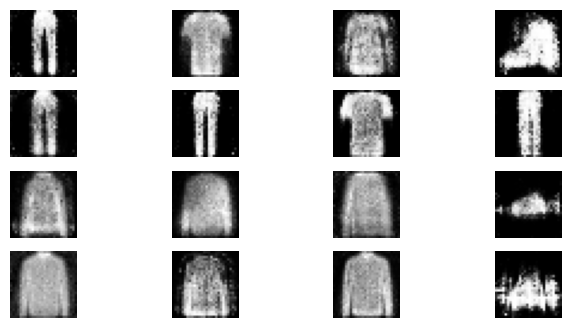

 56%|█████▌    | 28/50 [01:45<01:17,  3.54s/it]

Time for epoch 28 is 3.8670332431793213 sec
Training started with  epoch 29 with 469 batches...
Losses after epoch    29: generator 3.717, discriminator 0.431, real_score 82.67%, fake_score 9.92%


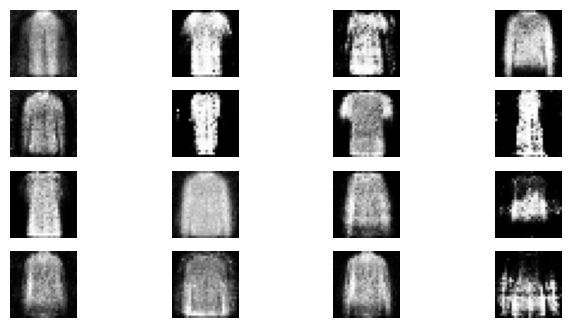

 58%|█████▊    | 29/50 [01:48<01:12,  3.46s/it]

Time for epoch 29 is 3.2731375694274902 sec
Training started with  epoch 30 with 469 batches...
Losses after epoch    30: generator 1.881, discriminator 1.024, real_score 70.69%, fake_score 26.69%


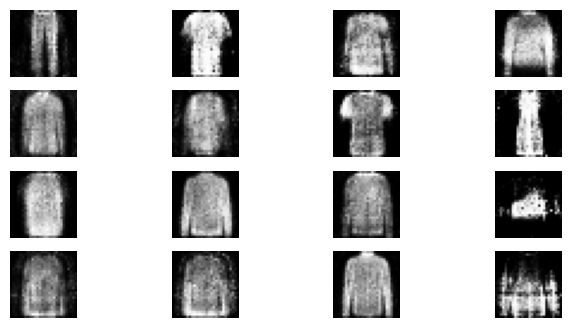

 60%|██████    | 30/50 [01:52<01:10,  3.52s/it]

Time for epoch 30 is 3.6657795906066895 sec
Training started with  epoch 31 with 469 batches...
Losses after epoch    31: generator 2.148, discriminator 0.697, real_score 85.65%, fake_score 23.23%


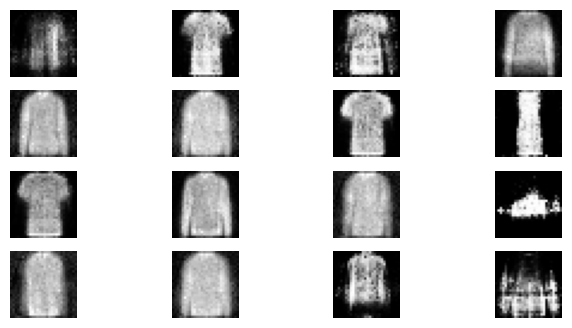

 62%|██████▏   | 31/50 [01:56<01:09,  3.65s/it]

Time for epoch 31 is 3.9356448650360107 sec
Training started with  epoch 32 with 469 batches...
Losses after epoch    32: generator 2.793, discriminator 0.479, real_score 87.50%, fake_score 15.39%


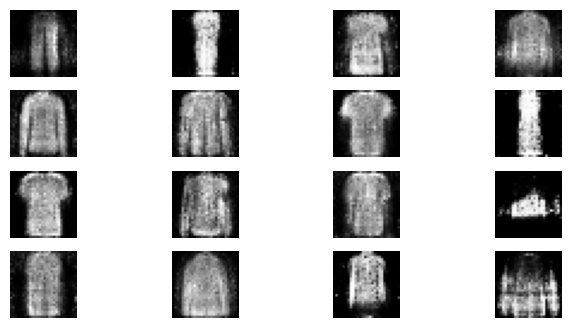

 64%|██████▍   | 32/50 [01:59<01:03,  3.54s/it]

Time for epoch 32 is 3.293797731399536 sec
Training started with  epoch 33 with 469 batches...
Losses after epoch    33: generator 2.263, discriminator 0.701, real_score 77.20%, fake_score 21.00%


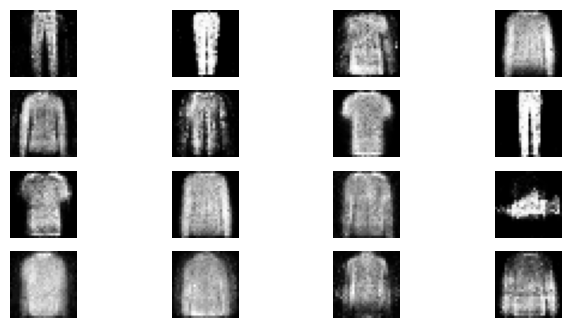

 66%|██████▌   | 33/50 [02:02<00:58,  3.47s/it]

Time for epoch 33 is 3.2905983924865723 sec
Training started with  epoch 34 with 469 batches...
Losses after epoch    34: generator 1.340, discriminator 1.542, real_score 63.39%, fake_score 35.67%


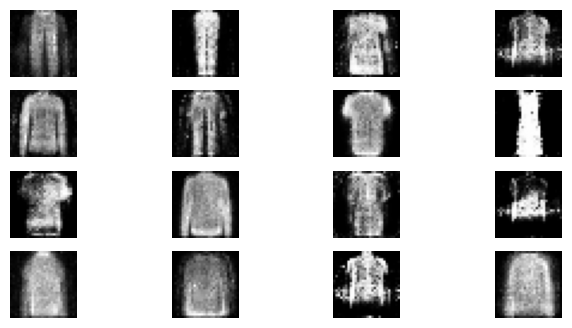

 68%|██████▊   | 34/50 [02:06<00:55,  3.46s/it]

Time for epoch 34 is 3.4383997917175293 sec
Training started with  epoch 35 with 469 batches...
Losses after epoch    35: generator 1.118, discriminator 1.278, real_score 67.44%, fake_score 41.41%


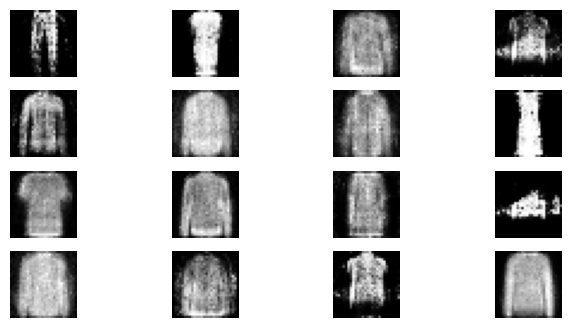

 70%|███████   | 35/50 [02:09<00:53,  3.58s/it]

Time for epoch 35 is 3.867309331893921 sec
Training started with  epoch 36 with 469 batches...
Losses after epoch    36: generator 2.154, discriminator 0.737, real_score 76.53%, fake_score 21.26%


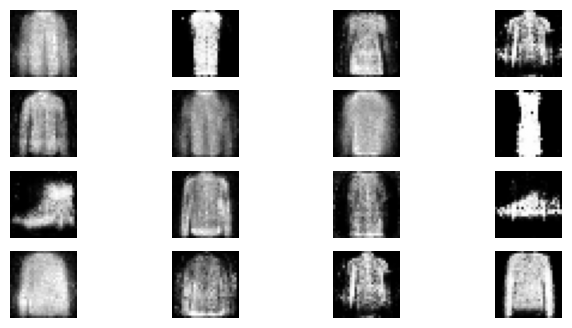

 72%|███████▏  | 36/50 [02:13<00:50,  3.59s/it]

Time for epoch 36 is 3.6217620372772217 sec
Training started with  epoch 37 with 469 batches...
Losses after epoch    37: generator 2.418, discriminator 0.496, real_score 83.75%, fake_score 17.12%


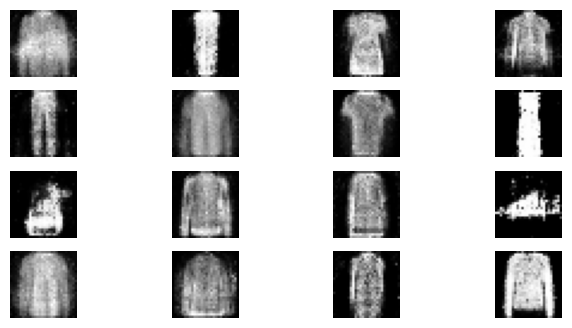

 74%|███████▍  | 37/50 [02:16<00:45,  3.50s/it]

Time for epoch 37 is 3.2676806449890137 sec
Training started with  epoch 38 with 469 batches...
Losses after epoch    38: generator 1.967, discriminator 0.933, real_score 77.58%, fake_score 28.78%


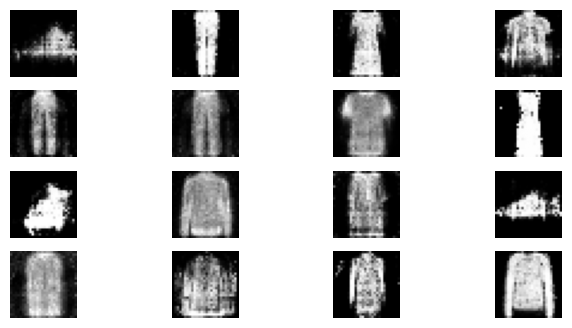

 76%|███████▌  | 38/50 [02:20<00:43,  3.63s/it]

Time for epoch 38 is 3.9449350833892822 sec
Training started with  epoch 39 with 469 batches...
Losses after epoch    39: generator 1.537, discriminator 0.891, real_score 73.28%, fake_score 31.55%


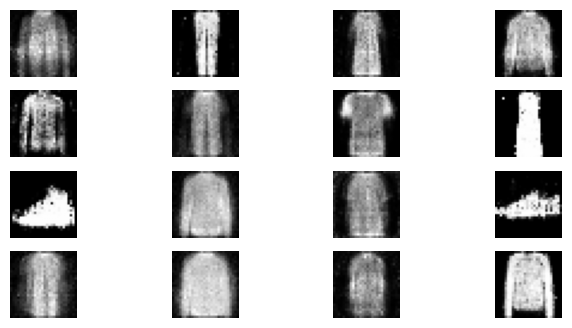

 78%|███████▊  | 39/50 [02:24<00:38,  3.52s/it]

Time for epoch 39 is 3.2529044151306152 sec
Training started with  epoch 40 with 469 batches...
Losses after epoch    40: generator 1.714, discriminator 0.844, real_score 80.00%, fake_score 30.20%


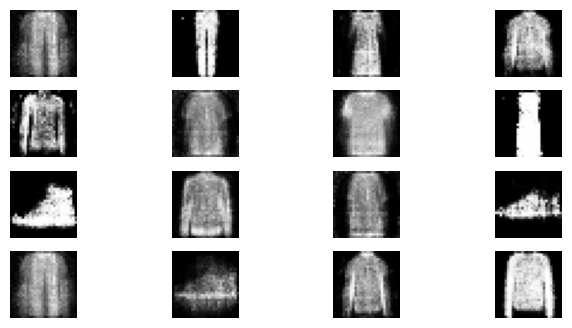

 80%|████████  | 40/50 [02:27<00:35,  3.51s/it]

Time for epoch 40 is 3.4823992252349854 sec
Training started with  epoch 41 with 469 batches...
Losses after epoch    41: generator 2.769, discriminator 0.681, real_score 79.62%, fake_score 18.03%


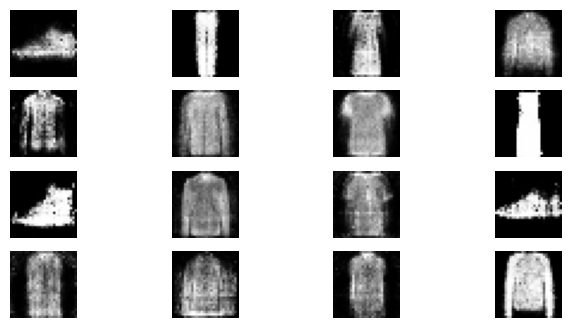

 82%|████████▏ | 41/50 [02:31<00:33,  3.67s/it]

Time for epoch 41 is 4.059103727340698 sec
Training started with  epoch 42 with 469 batches...
Losses after epoch    42: generator 1.477, discriminator 1.034, real_score 69.17%, fake_score 31.33%


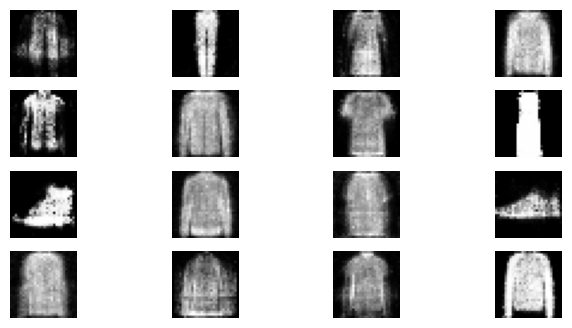

 84%|████████▍ | 42/50 [02:35<00:30,  3.75s/it]

Time for epoch 42 is 3.9381022453308105 sec
Training started with  epoch 43 with 469 batches...
Losses after epoch    43: generator 2.450, discriminator 0.724, real_score 77.27%, fake_score 19.45%


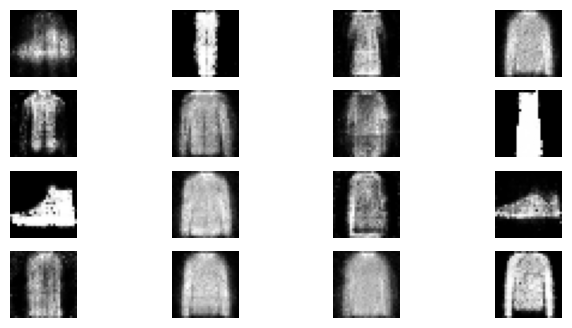

 86%|████████▌ | 43/50 [02:38<00:25,  3.61s/it]

Time for epoch 43 is 3.2619121074676514 sec
Training started with  epoch 44 with 469 batches...
Losses after epoch    44: generator 1.813, discriminator 0.929, real_score 73.66%, fake_score 27.18%


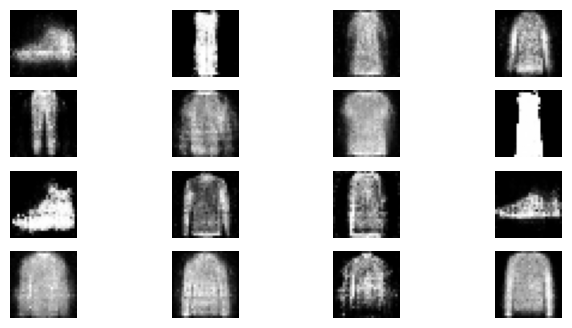

 88%|████████▊ | 44/50 [02:42<00:20,  3.50s/it]

Time for epoch 44 is 3.2472145557403564 sec
Training started with  epoch 45 with 469 batches...
Losses after epoch    45: generator 1.588, discriminator 1.036, real_score 63.78%, fake_score 26.30%


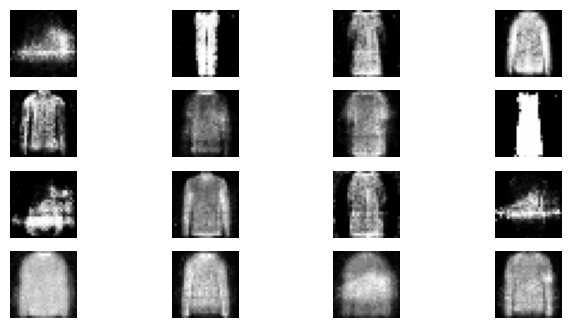

 90%|█████████ | 45/50 [02:46<00:18,  3.63s/it]

Time for epoch 45 is 3.947281837463379 sec
Training started with  epoch 46 with 469 batches...
Losses after epoch    46: generator 1.376, discriminator 1.004, real_score 64.12%, fake_score 30.84%


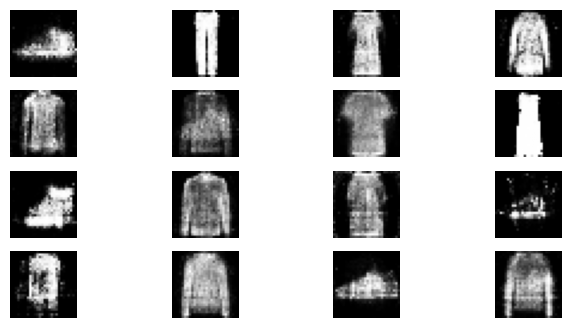

 92%|█████████▏| 46/50 [02:49<00:14,  3.52s/it]

Time for epoch 46 is 3.2358992099761963 sec
Training started with  epoch 47 with 469 batches...
Losses after epoch    47: generator 1.528, discriminator 0.891, real_score 78.26%, fake_score 33.15%


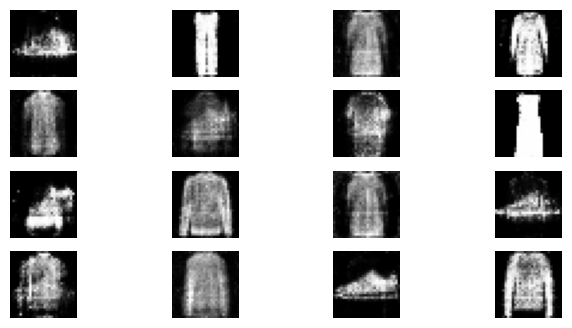

 94%|█████████▍| 47/50 [02:52<00:10,  3.43s/it]

Time for epoch 47 is 3.215959310531616 sec
Training started with  epoch 48 with 469 batches...
Losses after epoch    48: generator 1.657, discriminator 1.115, real_score 60.71%, fake_score 26.61%


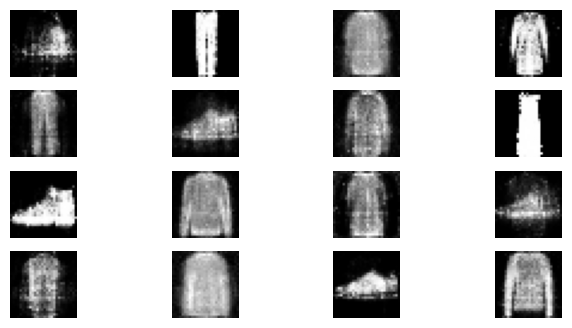

 96%|█████████▌| 48/50 [02:56<00:07,  3.66s/it]

Time for epoch 48 is 4.215748071670532 sec
Training started with  epoch 49 with 469 batches...
Losses after epoch    49: generator 1.693, discriminator 1.215, real_score 71.75%, fake_score 30.84%


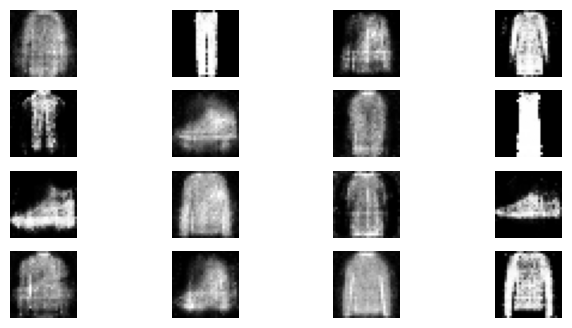

 98%|█████████▊| 49/50 [02:59<00:03,  3.55s/it]

Time for epoch 49 is 3.2690162658691406 sec
Training started with  epoch 50 with 469 batches...
Losses after epoch    50: generator 1.793, discriminator 1.008, real_score 67.29%, fake_score 26.58%


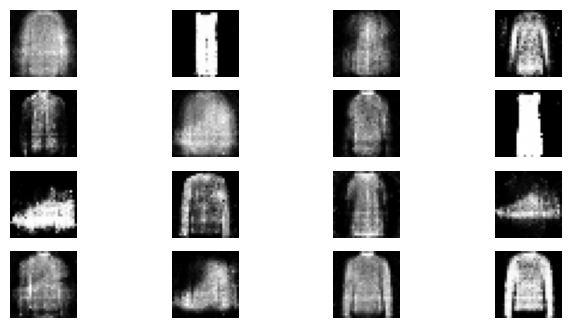

100%|██████████| 50/50 [03:03<00:00,  3.67s/it]

Time for epoch 50 is 3.372298240661621 sec


In [27]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs = epochs)

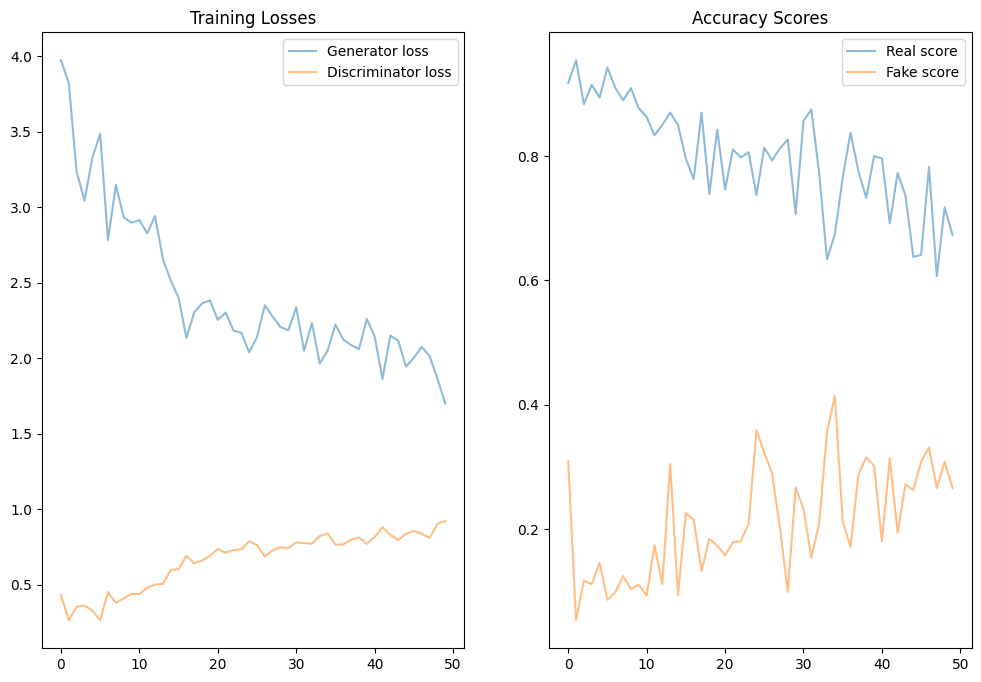

In [28]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12, 8))

ax1.plot(gen_loss_epochs, label = 'Generator loss', alpha = 0.5)
ax1.plot(disc_loss_epochs, label = 'Discriminator loss', alpha = 0.5)
ax1.legend()

ax1.set_title('Training Losses')
ax2.plot(real_score_list, label = 'Real score', alpha = 0.5)
ax2.plot(fake_score_list, label = 'Fake score', alpha = 0.5)
ax2.set_title('Accuracy Scores')

ax2.legend()